### Rohan Khaitan - MDS201812

### Importing Libraries

In [1]:
import numpy as np
import cv2
from PIL import Image
import os
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
os.chdir('/home/rohan/CMI/SEM_4/Computer_Vision/Assignment_2')

### Importing the images

In [39]:
lena = Image.open("Images/Images/Pyramids/lena.png")
hill= Image.open("Images/Images/Pyramids/hill_gray.png")
parrot =Image.open("Images/Images/Pyramids/parrot.png")
cameraman =Image.open("Images/Images/Pyramids/cameraman.jpg")
taj = Image.open("Images/Images/Pyramids/taj.jpg")
screen = Image.open("Images/Images/Pyramids/screen.jpg")
cat = Image.open("Images/Images/Pyramids/Cat.jpeg")

### Converting to numpy arrays

In [40]:
lena= np.array(lena)
hill=np.asarray(hill)
parrot= np.array(parrot)
cameraman= np.array(cameraman)
taj= np.array(taj)
screen= np.array(screen)
cat= np.array(cat)

### Checking the shape of the images

In [41]:
print("Shape of the lena:",lena.shape)
print("Shape of the hill",hill.shape)
print("Shape of the parrot:",parrot.shape)
print("Shape of the cameraman:",cameraman.shape)
print("Shape of the Taj Mahal:",taj.shape)
print("Shape of the walpaper:",screen.shape)
print("Shape of the cat:",cat.shape)

Shape of the lena: (512, 512, 3)
Shape of the hill (960, 1280)
Shape of the parrot: (340, 453, 3)
Shape of the cameraman: (256, 256, 3)
Shape of the Taj Mahal: (853, 1280, 3)
Shape of the walpaper: (900, 1233, 3)
Shape of the cat: (168, 300, 3)


##### Only hill image is in gray scale.

### Question 1

### Function to form the pyramid

In [6]:
def image_pyramid(image,h_ker,v_ker,level, min_shape=(30,30)):
    kernel= np.outer(v_ker.ravel(), h_ker.ravel())
    results=[image]
    for i in range(level):
        if i!=0:
            image= subsampled_img
            
        ## Blurring the image
        filtered_img = cv2.filter2D(image,-1,kernel)
        
        ## Subsampling by deleting even rows and columns
        subsampled_img = filtered_img[::2,::2]
        
        results.append(subsampled_img)
        
        ## Break if minimum dimension is reached
        if subsampled_img.shape[0]/2 < min_shape[0] or subsampled_img.shape[1]/2 < min_shape[1]:
            break
            
    return results

### Function for better visualization of downsampled pyramid images

In [7]:
## Function specific to this case of visualization

def pad_for_even(image):
    if image.shape[0]%2 ==0:
        return image
    else:
        image =cv2.copyMakeBorder(image,0,1,0,0,cv2.BORDER_REPLICATE)
    return image    


def pyramid_images_in_one(image,h_ker,v_ker,level):
    
    output=[]
    
    image=pad_for_even(image)
    pyramid_images= image_pyramid(image,h_ker,v_ker,level)
    
    for i in range(len(pyramid_images)):
        
        pyramid_images[i]= pad_for_even(pyramid_images[i])
        pad= int((image.shape[0] - pyramid_images[i].shape[0])/2)
        
        output.append(cv2.copyMakeBorder(pyramid_images[i],pad,pad,0,0,cv2.BORDER_CONSTANT))
    
   
    print_output= np.append(output[0],output[1],axis=1)
    
    for i in range(2,len(output)):
        print_output= np.append(print_output,output[i],axis=1)    
        
    return print_output    

### Question 2

### Separable Kernels

### Binomial Kernel

In [8]:
h_ker = (1/16)*np.array([1,4, 6,4,1])
v_ker = (1/16)*np.array([1,4, 6,4,1])

### Box kernel

In [9]:
h_ker_box = (1/5)*np.array([1,1,1,1,1])
v_ker_box = (1/5)*np.array([1,1,1,1,1])

Both can be used for for 5*5 window convolution. Output is shown by applying both kernels

In [10]:
pyramid_lena_plot_bi= pyramid_images_in_one(lena,h_ker,v_ker,4)
pyramid_lena_plot_box= pyramid_images_in_one(lena,h_ker_box,v_ker_box,4)

### Result using binomial kernel

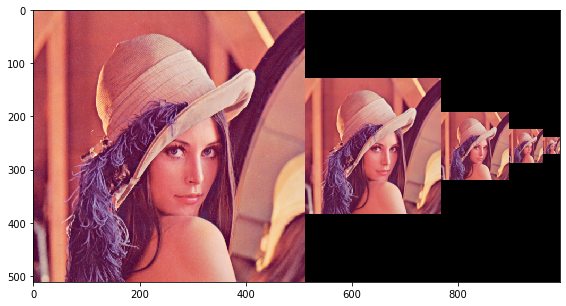

In [11]:
plt.figure(figsize=(15,5))
plt.imshow(pyramid_lena_plot_bi)
plt.show();

### Result using applying box kernel

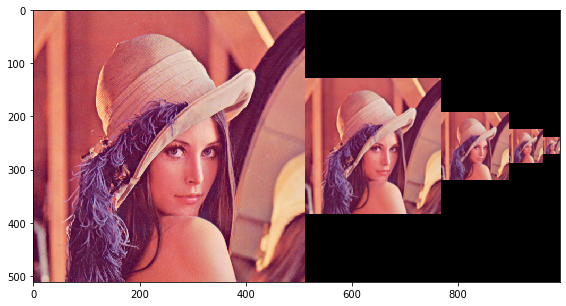

In [12]:
plt.figure(figsize=(15,5))
plt.imshow(pyramid_lena_plot_box)
plt.show();

#### In the next question the effects are also clearly shown.

### Question 3

**Two images are used.** <br>
**For coloured- Lena** <br>
**For grayscale- Hill** 

In [50]:
pyramid_lena= image_pyramid(lena,h_ker,v_ker,5)
pyramid_hill= image_pyramid(hill,h_ker,v_ker,5)
pyramid_screen= image_pyramid(screen,h_ker,v_ker,5)
pyramid_taj = image_pyramid(taj,h_ker,v_ker,5)

## For better visualization of downsampling
pyramid_lena_plot= pyramid_images_in_one(lena,h_ker,v_ker,5)
pyramid_hill_plot= pyramid_images_in_one(hill,h_ker,v_ker,5)
pyramid_screen_plot= pyramid_images_in_one(screen,h_ker,v_ker,5)
pyramid_taj_plot= pyramid_images_in_one(taj,h_ker,v_ker,5)

### Visualization 

In [55]:
# imgs = ["Lena","Hill","Screen","Taj"]
# for i in range(len(imgs)):
#     plt.figure(figsize=(15,5))
#     plt.title(str(imgs[i])+"(Image Pyramid)")
#     plt.imshow(eval("pyramid_"+imgs[i].lower()+"_plot"))
# plt.show();

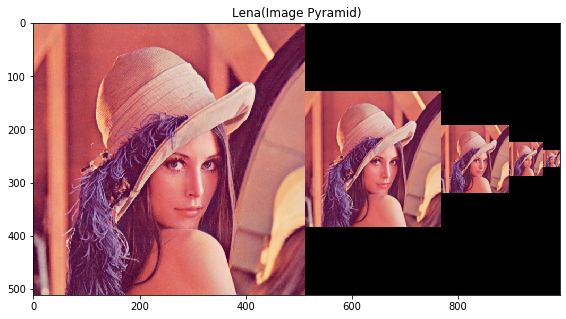

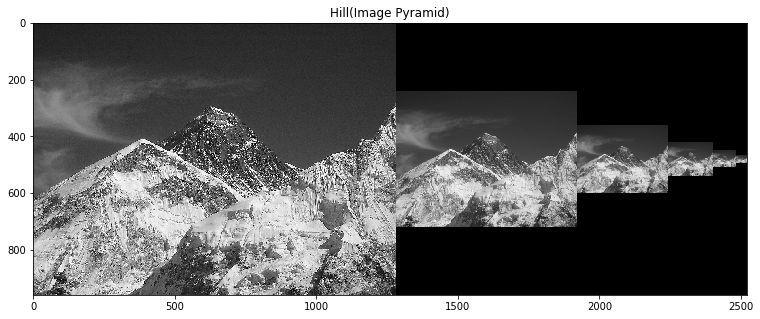

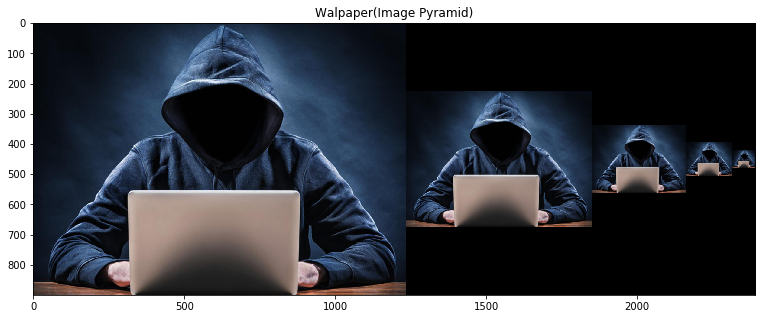

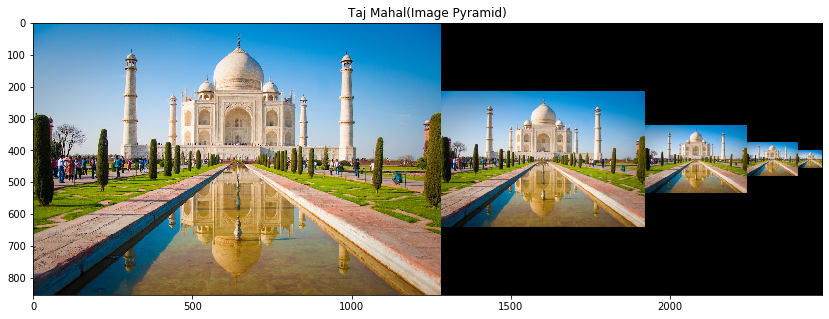

In [57]:
plt.figure(figsize=(15,5))
plt.title("Lena(Image Pyramid)")
plt.imshow(pyramid_lena_plot)
plt.figure(figsize=(15,5))
plt.title("Hill(Image Pyramid)")
plt.imshow(pyramid_hill_plot, cmap="gray")
plt.figure(figsize=(15,5))
plt.title("Walpaper(Image Pyramid)")
plt.imshow(pyramid_screen_plot)
plt.figure(figsize=(15,5))
plt.title("Taj Mahal(Image Pyramid)")
plt.imshow(pyramid_taj_plot)
plt.show();

### Visualizing pyramid images individually (To check the effects clearly)

In [58]:
def plot_diff_labels(pyramid_img, cmap='viridis',axis="on"):
    f, axarr = plt.subplots(1,len(pyramid_img))
    f.set_figheight(15)
    f.set_figwidth(15)
    for i in range(len(pyramid_img)):
        axarr[i].imshow(pyramid_img[i],cmap=cmap)
        axarr[i].set_title("Level "+str(i))
        axarr[i].axis(axis)
    plt.show();

#### For Image Lena

In [59]:
print("No of pyramid images for lena:",len(pyramid_lena))

No of pyramid images for lena: 5


It is because the given minimum resolution(30*30) is achived at 4th level

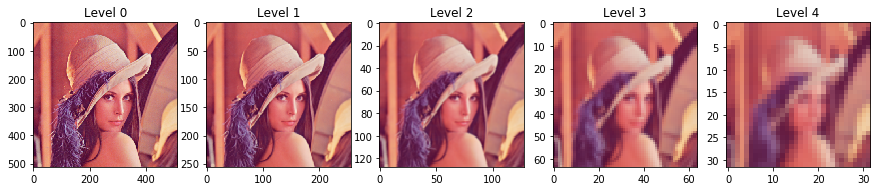

In [61]:
plot_diff_labels(pyramid_lena)

#### For hill image

In [62]:
print("Shape of hill at first level",pyramid_hill[1].shape)

Shape of hill at first level (480, 640)


The hill image is in gray scale and it's shape is reduced by half at first level.

In [63]:
print("No of pyramid images for hill:",len(pyramid_hill))

No of pyramid images for hill: 6


For hill image the minimum resolution is not reached till 5th level.

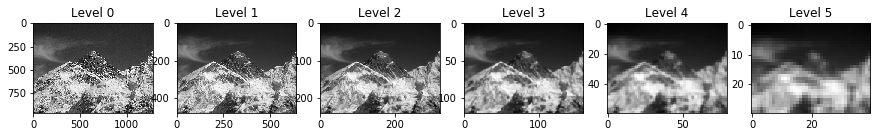

In [64]:
plot_diff_labels(pyramid_hill, cmap="gray")

#### For screen image

In [65]:
plot_diff_labels(pyramid_screen, axis="off")

#### For Image Taj Mahal

In [66]:
plot_diff_labels(pyramid_taj, axis="off")

### Question 4

### Up sampling

In [67]:
## This function only add zeroes at alternate positions for rows and columns

def insert_zeros(array, N=1):
    out = np.zeros( (N+1)*np.array(array.shape),dtype=array.dtype)
    out[::N+1,::N+1] = array
    return out

In [68]:
## Function to apply the previous function for all all images with any no of channels

def up_sampling(image):
    
    if len(image.shape)==2:
        upsampled_img= insert_zeros(image)
        return upsampled_img
    
    else:
        temp=[]
        channel=image.shape[2]
        for i in range(channel):
            temp.append(insert_zeros(image[:,:,i]))
        upsampled_img= np.dstack((temp))    
    
    return upsampled_img     

In [69]:
### This function computes the upsampled image

def up_pyramid(image,h_ker,v_ker,level, max_shape=(20000,20000)):
    kernel= np.outer(v_ker.ravel(), h_ker.ravel())
    results=[image]
    for i in range(level):
        if i!=0:
            image= filtered_img
            
        # Applying the up_sampling function
        upsampled_img = up_sampling(image)
        
        ## Now blurring the upsampled image
        filtered_img = cv2.filter2D(upsampled_img,-1,kernel)
        
        ## To get rid of the darkening effect
        filtered_img = filtered_img*4

        results.append(filtered_img)
        
        ## Break the loop if maximum resolution is reached
        if filtered_img.shape[0]*2 > max_shape[0] or filtered_img.shape[1]*2 > max_shape[1]:
            break
            
    return results

### For better visualization

In [70]:
## For visualizing the dimensional change

def up_pyramid_images_in_one(image,h_ker,v_ker,level=3):
    
    image=pad_for_even(image)
    pyramid_images= up_pyramid(image,h_ker,v_ker,level)
    output=[]
    
    for i in range(len(pyramid_images),0,-1):
        pyramid_images[i-1]= pad_for_even(pyramid_images[i-1])

        pad= int((pyramid_images[-1].shape[0] - pyramid_images[i-1].shape[0])/2)

        output.append(cv2.copyMakeBorder(pyramid_images[i-1],pad,pad,0,0,cv2.BORDER_CONSTANT))
    
    print_output= np.append(output[-1],output[-2],axis=1)
    
    for i in range(len(output)-2,0,-1):
        print_output= np.append(print_output,output[i-1],axis=1)  
        
    return print_output    

### Applying for parrot image

In [71]:
pyramid_up_parrot = up_pyramid_images_in_one(parrot,h_ker,v_ker,4)

In [72]:
plt.figure(figsize=(15,5))
plt.imshow(pyramid_up_parrot)
plt.show();

### Applying for some other images

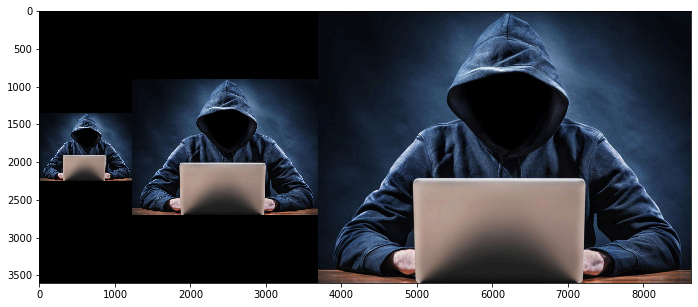

In [74]:
pyramid_up_screen = up_pyramid_images_in_one(screen,h_ker,v_ker,2)
plt.figure(figsize=(15,5))
plt.imshow(pyramid_up_screen)
plt.show();

In [75]:
pyramid_up_cat = up_pyramid_images_in_one(cat,h_ker,v_ker,4)
plt.figure(figsize=(15,5))
plt.imshow(pyramid_up_cat)
plt.show();

#### Visualizing the effects clearly

In [82]:
def plot_up_labels(up_pyramid_img, cmap='viridis',axis="on"):
    f, axarr = plt.subplots(1,len(up_pyramid_img))
    f.set_figheight(15)
    f.set_figwidth(15)
    for i in range(len(up_pyramid_img)):
        axarr[i].imshow(up_pyramid_img[i])
        axarr[i].set_title("Level "+str(i))
    plt.show();

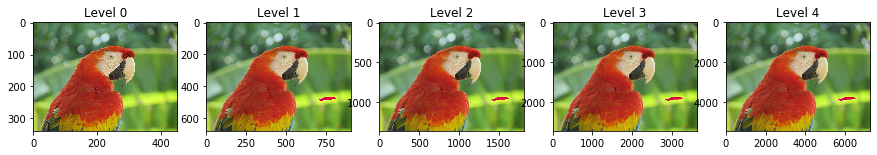

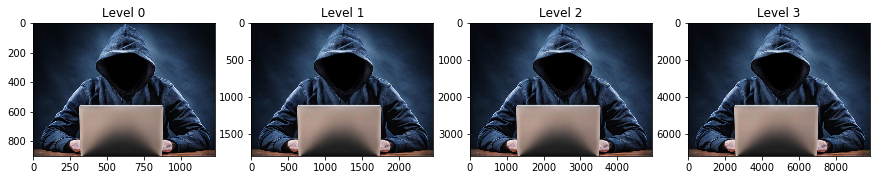

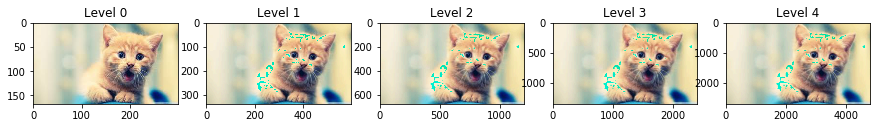

In [83]:
up_pyramid_parrot=up_pyramid(parrot,h_ker,v_ker,4)
up_pyramid_screen=up_pyramid(screen,h_ker,v_ker,3)
up_pyramid_cat=up_pyramid(cat,h_ker,v_ker,4)

plot_up_labels(up_pyramid_parrot)
plot_up_labels(up_pyramid_screen)
plot_up_labels(up_pyramid_cat)

### Question 5

#### A function to adjust padding

Padding adjustment requires for laplacian pyramid.
When we take difference between the image at each level and the up-sampled image from the level
above, the shape will not necessarily same.

In [84]:
## This function takes two images as input 
## Returns two images of same dimension
## If the input images are of same shape it returns the same

def adjust_padding(image_1,image_2):
    
    pad_height= image_1.shape[0] -image_2.shape[0]
    pad_width= image_1.shape[1] -image_2.shape[1]
    
    if image_1.shape==image_2.shape:
        return ((image_1,image_2))
    
    if pad_height < 0:
        image_1 = cv2.copyMakeBorder(image_1,0,-pad_height,0,0,cv2.BORDER_REPLICATE)
    else:
        image_2 = cv2.copyMakeBorder(image_2,0,pad_height,0,0,cv2.BORDER_REPLICATE)
    
    
    if pad_width < 0:
        image_1 = cv2.copyMakeBorder(image_1,0,0,0,-pad_width,cv2.BORDER_REPLICATE)
    else:
        image_2 = cv2.copyMakeBorder(image_2,0,0,0,pad_width,cv2.BORDER_REPLICATE) 
        
    return((image_1,image_2))    

#### Function for obtaining laplacian pyramid

#### This function doesn't take gaussian pyramid as input
#### In case we haven't stored gaussian pyramid we can use this function

In [85]:
## The function return the laplacian pyramid images
## If we also want gaussian upsampled images we need to set return_gaussian_upsampled to be true

def laplacian_pyramid(image,h_ker,v_ker,level,return_gaussian_upsampled=False):
    laplace_pyramid=[]
    gaussian_upsampled=[]
    
    for i in range(level):
        
        down= image_pyramid(image,v_ker,h_ker,1)[-1]
        up= up_pyramid(down,v_ker,h_ker,1)[-1]
        
        gaussian_upsampled.append(up)
        
        image_1,image_2 = adjust_padding(image, up)
        
        laplacian= image_1 - image_2
        laplace_pyramid.append(laplacian)
        
        image= down
        
    if return_gaussian_upsampled== True:
        return((gaussian_upsampled,laplace_pyramid))
    
    return laplace_pyramid

### This laplacian function takes gaussian pyramid as input 

In [86]:
def laplacian_from_gaussian(gaussian_pyramid,h_ker,v_ker,return_gaussian_upsampled=False ):
    
    laplace_pyramid=[]
    gaussian_upsampled=[]
    
    for i in range(len(gaussian_pyramid)-1):
        
        up = up_pyramid(gaussian_pyramid[i+1],v_ker,h_ker,1)[-1]
        
        gaussian_upsampled.append(up)
        
        image_1,image_2 = adjust_padding(gaussian_pyramid[i], up)
        
        laplacian= image_1 - image_2
        laplace_pyramid.append(laplacian)
       
    if return_gaussian_upsampled== True:
        return((gaussian_upsampled,laplace_pyramid))
    
    return laplace_pyramid

### Question 6

#### Using the gaussian pyramid obtained in question 3

In [90]:
lena_lap_from_gaussian= laplacian_from_gaussian(pyramid_lena, h_ker, v_ker, return_gaussian_upsampled=False)
hill_lap_from_gaussian= laplacian_from_gaussian(pyramid_hill, h_ker, v_ker, return_gaussian_upsampled=False)
taj_lap_from_gaussian= laplacian_from_gaussian(pyramid_taj, h_ker, v_ker, return_gaussian_upsampled=False)
screen_lap_from_gaussian= laplacian_from_gaussian(pyramid_screen, h_ker, v_ker, return_gaussian_upsampled=False)

#### Visualization for lena

In [100]:
def plot_laplacian_pyramid(img_name):
    f, axarr = plt.subplots(2,2)
    f.set_figheight(12)
    f.set_figwidth(12)
    axarr[0,0].imshow(eval(img_name))
    axarr[0,0].axis('off')
    axarr[0,1].imshow(eval(img_name+"_lap_from_gaussian[0]"))
    axarr[0,1].axis('off')
    axarr[1,0].imshow(eval(img_name+"_lap_from_gaussian[1]"))
    axarr[1,0].axis('off')
    axarr[1,1].imshow(eval(img_name+"_lap_from_gaussian[2]"))
    axarr[1,1].axis('off')


    axarr[0,0].set_title("Original")
    axarr[0,1].set_title('Level 1 laplacian')
    axarr[1,0].set_title('Level 2 laplacian')
    axarr[1,1].set_title('Level 3 laplacian')
    plt.show();

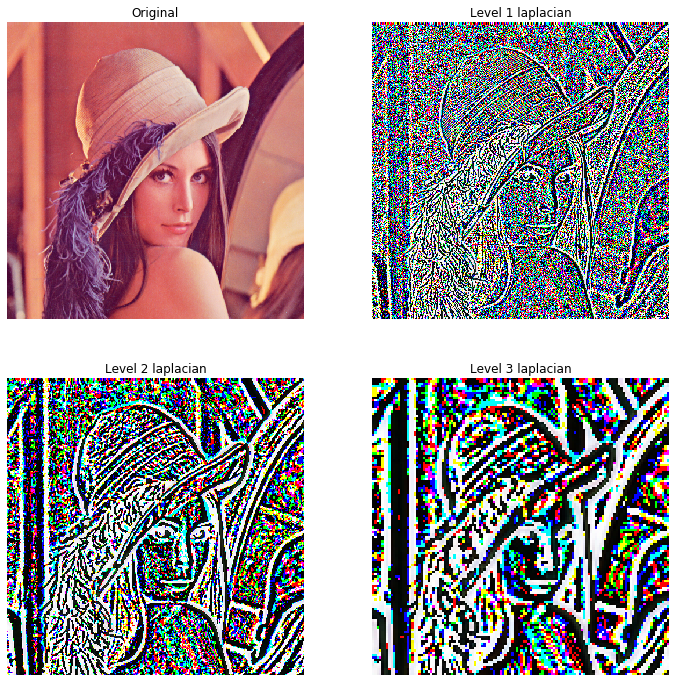

In [101]:
plot_laplacian_pyramid("lena")

#### Visualization for Screen image

In [102]:
plot_laplacian_pyramid("screen")

#### Visualization for Taj Mahal image

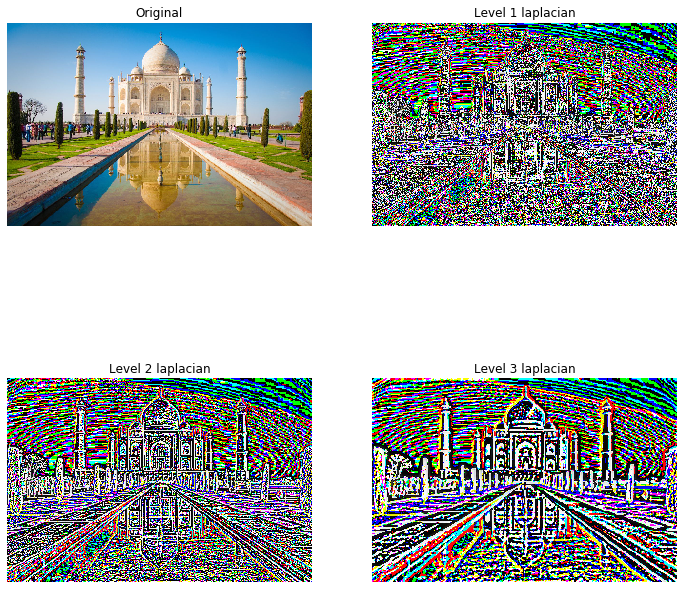

In [103]:
plot_laplacian_pyramid("taj")

#### Following will provide same output
**Without using the stored gaussian, instead creating the gaussian and then following the same procedure**

In [104]:
lena_lap=laplacian_pyramid(lena,v_ker,h_ker,3)
hill_lap=laplacian_pyramid(hill,v_ker,h_ker,3)

### Question 7

### Reconstruct an image

In [105]:
def reconstruct(gaussian_upsampled, laplacian_pyramid):
    actual_image=[]
    for i in range(len(gaussian_upsampled)):
        actual_image.append(gaussian_upsampled[i]+laplacian_pyramid[i])
    return actual_image   

In [106]:
gaussian_upsampled_lena, laplace_pyramid_lena= laplacian_pyramid(lena,h_ker,v_ker,4,return_gaussian_upsampled=True)

In [107]:
reconstruct_lena= reconstruct(gaussian_upsampled_lena, laplace_pyramid_lena)

In [108]:
f, axarr = plt.subplots(1,len(reconstruct_lena))
f.set_figheight(15)
f.set_figwidth(15)
for i in range(len(reconstruct_lena)):
    axarr[i].imshow(reconstruct_lena[i])
    axarr[i].set_title("Reconstructed at Level "+str(i))
plt.show();

### Question 8

### Comparing the reconstruction and the original image

In [109]:
reconstruct_lena= reconstruct(gaussian_upsampled_lena, laplace_pyramid_lena)

#### Here we take the difference at each level 

In [112]:
difference_lena=[]
for i in range(len(reconstruct_lena)):
    difference_lena.append(pyramid_lena[i] - reconstruct_lena[i])

In [113]:
f, axarr = plt.subplots(1,len(difference_lena))
f.set_figheight(15)
f.set_figwidth(15)
for i in range(len(difference_lena)):
    axarr[i].imshow(difference_lena[i])
    axarr[i].set_title("Differenced at Level "+str(i))
plt.show();

The image Lena has dimension of the form 2^N(512)

**Comment**: We can see that all the pixel values of the images are zero for this image lena. It means that the the image is reconstructed well and exactly matches the original image at each level. In case where the dimension of image is not of the form 2^N, we may not have all the pixel values of the difference of original and reconstructed image at some level to be zero but it will be very close to zero(it also depends on type of padding done). It happens because padding is done in those cases where shape of original image and the upsampled gaussian are different. <br>
<br> In fact if original image is of odd dimension, then the downsampled image won't be exactly half if we don't do padding. Now the upsampled gaussian obtained from this downsampled(not padded) image won't be of same dimension of the original image. So here we do the padding to make the upsampled gaussian image to be of same shape of the original image. Now if the level of downsampling is more than 1 then we face this issue for other level images for all image dimensions not of the form 2^N(not only odd).

### Extra question

#### The following function takes any two images as input and merge them vertically or horizontally as needed.
If both height and width of the images are not same then it throws error.<br>
If we want vertical blending then it throws error if only height of the images are not same.<br>
If we want horizontal blending then it throws error if only height of the images are not same.<br>
Default is vertical blending.


In [162]:
x=np.array([1,2,3])
y=np.array([1,1,1])
x

array([1. , 1.5, 2. ])

In [188]:
def merge(image_1,image_2,vertical=True):
    w1=image_1.shape[1] ## Width for image 1
    w2=image_2.shape[1]
    
    h1=int(image_1.shape[0]) ## height for image 1
    h2=int(image_2.shape[0])
    
    
    if vertical ==True:

        if image_1.shape[0]!=image_2.shape[0]:
            return("Error! Images can not be merged vertically due to wrong dimension")

        
        if image_1.shape[1]%2==0:
            image=np.append(image_1[:,:w1//2,:],image_2[:,w2//2+1:,:],axis=1)
            return image 
        
        else:
            left = image_1[:,:w1//2,:]
            right = image_2[:,w2//2+1:,:]
            middle = image_1[:,w1//2:w1//2+1,:] + image_2[:,w2//2:w2//2+1,:]

            image= np.concatenate([left,middle,right],axis=1)
            return(image)
    
    else: 

        if image_1.shape[1]!=image_2.shape[1]:
            return("Error! Images can not be merged horizontally due to wrong dimension")

        if image_1.shape[0]%2==0:
            image=np.concatenate([image_1[:h1//2,:,:],image_2[h2//2+1:,:,:]],axis=0)
            return image 
        
        else:
            left = image_1[:h1//2,:,:]
            right = image_2[h2//2+1:,:,:]
            middle = image_1[h1//2:h1//2+1,:,:] + image_2[h2//2:h2//2+1,:,:]
            image= np.concatenate([left,middle,right],axis=0)
            return(image)

### Function specific to the problem

In [189]:
def merge_for_same_dim(image_1,image_2):
    if image_1.shape!= image_2.shape:
        return("Error! Dimension mismatch.")
    else:
        return merge(image_1,image_2)

### Importing images for this task

In [190]:
rohit=np.array(Image.open("Images/Extra_images/rohit.jpeg"))
virat=np.array(Image.open("Images/Extra_images/kohli.jpeg"))

In [191]:
print("shape of rohit:",rohit.shape)
print("shape of virat:",virat.shape)

shape of rohit: (225, 225, 3)
shape of virat: (225, 225, 3)


#### So the dimension is not of the form 2^N

### Laplacian pyramid of different levels 

In [192]:
rohit_lap=laplacian_pyramid(rohit,v_ker,h_ker,3)
virat_lap =laplacian_pyramid(virat,v_ker,h_ker,3)

### Upsampled Gaussian of different levels 

In [193]:
rohit_upgauss,_= laplacian_pyramid(rohit,v_ker,h_ker,3,return_gaussian_upsampled=True)
virat_upgauss,_= laplacian_pyramid(virat,v_ker,h_ker,3,return_gaussian_upsampled=True)

### Merge

In [194]:
mer_rv= merge(rohit,virat)
mer_rv_lap_1=merge(rohit_lap[0],virat_lap[0])
mer_rv_lap_3=merge(rohit_lap[-1],virat_lap[-1])
mer_rv_upgauss_1=merge(rohit_upgauss[0],virat_upgauss[0])
mer_rv_upgauss_3=merge(rohit_upgauss[-1],virat_upgauss[-1])

### First level Laplacian

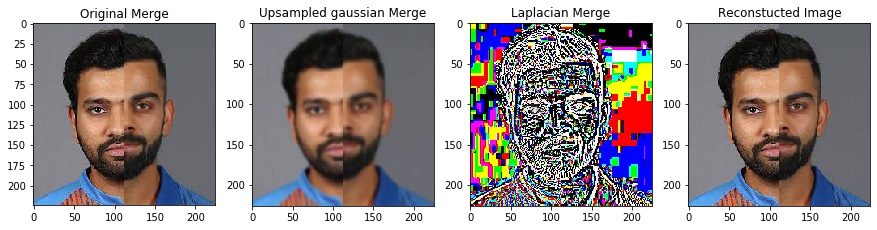

In [196]:
f, axarr = plt.subplots(1,4)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(mer_rv)
axarr[1].imshow(mer_rv_upgauss_1)
axarr[2].imshow(mer_rv_lap_1)
axarr[3].imshow(mer_rv_upgauss_1 + mer_rv_lap_1)

axarr[0].set_title("Original Merge")
axarr[1].set_title('Upsampled gaussian Merge')
axarr[2].set_title('Laplacian Merge')
axarr[3].set_title('Reconstucted Image')
plt.show();

#### We can see the reconstructed image matches the original.

### For galaxy image

Here I have only for level 1 laplacian

### Read the images

In [197]:
galaxy1=np.array(Image.open("Images/Images/Mosaic/galaxy1.jpg"))
galaxy2=np.array(Image.open("Images/Images/Mosaic/galaxy2.jpg"))

#### Upsample gaussian and laplacian pyramid

In [198]:
galaxy1_upgauss,galaxy1_lap= laplacian_pyramid(galaxy1,v_ker,h_ker,3,return_gaussian_upsampled=True)
galaxy2_upgauss,galaxy2_lap= laplacian_pyramid(galaxy2,v_ker,h_ker,3,return_gaussian_upsampled=True)

### Merge

In [199]:
mer= merge(galaxy1,galaxy2)
mer_lap_1=merge(galaxy1_lap[0],galaxy2_lap[0])
mer_lap_3=merge(galaxy1_lap[-1],galaxy2_lap[-1])
mer_upgauss_1=merge(galaxy1_upgauss[0],galaxy2_upgauss[0])
mer_upgauss_3=merge(galaxy1_upgauss[-1],galaxy2_upgauss[-1])

### Laplacian at 1st level

In [201]:
f, axarr = plt.subplots(1,4)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(mer)
axarr[1].imshow(mer_upgauss_1)
axarr[2].imshow(mer_lap_1)
axarr[3].imshow(mer_upgauss_1 + mer_lap_1)

axarr[0].set_title("Original Merge")
axarr[1].set_title('Upsampled gaussian Merge')
axarr[2].set_title('Laplacian Merge')
axarr[3].set_title('Reconstucted Image')
plt.show();

In [202]:
galaxy1_pyramid = image_pyramid(galaxy1,v_ker,h_ker,3)
galaxy2_pyramid = image_pyramid(galaxy2,v_ker,h_ker,3)
mer_down_3= merge(galaxy1_pyramid[2],galaxy2_pyramid[2])

### Laplacian 3rd level

In [203]:
f, axarr = plt.subplots(1,4)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(mer_down_3)
axarr[1].imshow(mer_upgauss_3)
axarr[2].imshow(mer_lap_3)
axarr[3].imshow(mer_upgauss_3+mer_lap_3)

axarr[0].set_title("Gaussian original")
axarr[1].set_title('Upsampled gaussian Merge at 3rd level')
axarr[2].set_title('Laplacian Merge at 3rd level')
axarr[3].set_title('Reconstucted Image at 3rd level')
plt.show();